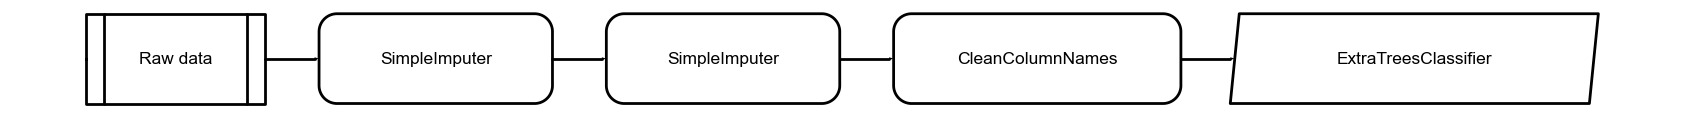

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

                                    Model  Accuracy     AUC  Recall   Prec.  \
et                 Extra Trees Classifier    0.9687  0.9967  0.9643  0.9495   
svm                   SVM - Linear Kernel    0.9686  0.9964  0.9522  0.9613   
knn                K Neighbors Classifier    0.9644  0.9869  0.9460  0.9543   
lr                    Logistic Regression    0.9623  0.9964  0.9342  0.9597   
ridge                    Ridge Classifier    0.9623  0.9962  0.9221  0.9721   
lda          Linear Discriminant Analysis    0.9623  0.9962  0.9221  0.9721   
nb                            Naive Bayes    0.9603  0.9834  0.9761  0.9209   
rf               Random Forest Classifier    0.9581  0.9953  0.9338  0.9498   
ada                  Ada Boost Classifier    0.9581  0.9862  0.9335  0.9485   
lightgbm  Light Gradient Boosting Machine    0.9581  0.9946  0.9393  0.9435   
gbc          Gradient Boosting Classifier    0.9498  0.9931  0.9276  0.9324   
qda       Quadratic Discriminant Analysis    0.9457 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pycaret.classification import *
from pycaret.datasets import get_data

df = get_data('cancer')

print(df.head())
print(df.info())
print(df.isnull().sum())
print(df.describe())

# Доброякісні та злоякісні пухлини
plt.figure(figsize=(6, 4))
df['Class'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Class')
plt.ylabel('Кількість')
plt.title('Розподіл цільової змінної (Class)')
plt.xticks([0, 1], ['Доброякісна', 'Злоякісна'], rotation=0)
plt.show()

# Кореляційна матриця
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Кореляційна матриця')
plt.xticks(range(len(df.columns)), df.columns, rotation=90)
plt.yticks(range(len(df.columns)), df.columns)
plt.show()

clf = setup(df, target='Class', session_id=123)
best_model = compare_models()
evaluate_model(best_model)
metrics = pull()
print(metrics)

save_model(best_model, 'cancer_model')
df.to_csv('Cancer.csv', index=False)
